In [1]:
import pandas as pd

result_df = pd.read_csv("model1_finetune_5e-6_freeze_disease.csv")

In [2]:
result_df = result_df[result_df["test"] == True][
    result_df["model_path"].str.contains("model1_freeze_disease")
]
result_df.columns

Index(['Name', 'step', 'test_mse', 'valid_mse', 'epoch_loss', 'epoch', 'test',
       'model_path', 'Notes', 'State', 'User', 'Tags', 'Created', 'Runtime',
       'Sweep', 'batch_size', 'device', 'freeze_disease_encoder',
       'freeze_prot_encoder', 'lr', 'max_epoch', 'patience',
       'prot_encoder_path', 'save_name', 'save_path_prefix',
       'text_encoder_path', 'train_dir'],
      dtype='object')

In [3]:
result_df = result_df[["step", "test_mse", "valid_mse"]]
result_df_test_mse = result_df[["step", "test_mse"]].rename(
    columns={"step": "step", "test_mse": "mse"}
)
result_df_test_mse["set"] = "model1_test"
result_df_valid_mse = result_df[["step", "valid_mse"]].rename(
    columns={"step": "step", "valid_mse": "mse"}
)
result_df_valid_mse["set"] = "model1_valid"
plot_df = result_df_test_mse.append(result_df_valid_mse)




result_df = pd.read_csv("model1_LightGBM_finetune_5e-6_freeze_disease.csv")
result_df = result_df[result_df["test"] == 1]
result_df = result_df[result_df["test"] == True][
    result_df["model_short"].str.contains("model1_freeze_disease_encoder")
]
result_df["step"] = result_df["model_short"].apply(lambda x: int(x.split("_step_")[-1].split("_")[0]))
result_df = result_df[["step", "mse"]]
result_df["set"]="model1+lightgbm_test"
plot_df = plot_df.append(result_df)


plot_df = plot_df.sort_values(by=['step'])
plot_df["step"] = plot_df["step"].apply(lambda x: str(x)[:-3]+"K")
plot_df.head()

,step,mse,set
39,10K,0.017499,model1+lightgbm_test
19,10K,0.017200,model1_valid
19,10K,0.019500,model1_test
18,20K,0.018200,model1_valid
18,20K,0.020500,model1_test


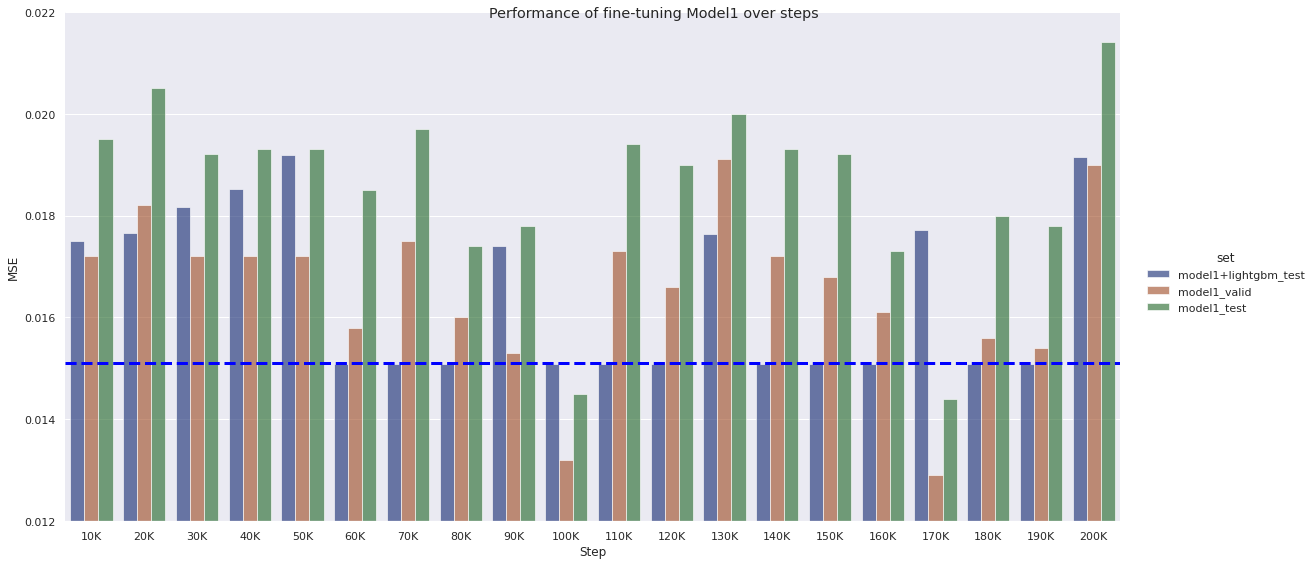

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set(style="darkgrid")    
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 21.7,8.27
palette = sns.color_palette("bright", 4)

g = sns.catplot(
    data=plot_df,
    kind="bar",
    x="step",
    y="mse",
    hue="set",
    ci="sd",
    palette="dark",
    height=8,
    aspect=2,
    alpha=0.6,
)
g.set(ylim=(0.012, 0.022))
g.despine(left=True)
g.refline(y = 0.0151,
          color = "blue",
          lw = 3)
g.set_axis_labels("Step", "MSE")
g.fig.suptitle("Performance of fine-tuning Model1 over steps")
plt.show()